# Data Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import os

In [3]:

folder_path = "/kaggle/input/underway-pco-and-ocean-data-rv-j-clark-ross"

csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

df_list = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

df.head()


JD_GMT DATE_UTC__ddmmyyyy TIME_UTC_hh:mm:ss  LAT_dec_degree  \
0  7.6910         07/01/2019          16:35:00        -52.6318   
1  7.6938         07/01/2019          16:39:00        -52.6314   
2  7.6972         07/01/2019          16:44:00        -52.6309   
3  7.7000         07/01/2019          16:48:00        -52.6304   
4  7.7090         07/01/2019          17:01:00        -52.6293   

   LONG_dec_degree  xCO2_equ[umol/mol]  Patm [hPa]  Tequ [deg.C]  SST [deg.C]  \
0         -62.2689              380.41      997.69          9.81         8.75   
1         -62.2417              360.27      997.69          9.78         8.75   
2         -62.2140              352.18      997.69          9.75         8.75   
3         -62.1867              356.39      997.69          9.51         8.75   
4         -62.1128              355.02      997.69          9.31         8.75   

     Sal  pCO2_sw[uatm]  pCO2_atm[uatm]  fCO2_sw[uatm]  fCO2_atm[uatm]  \
0  33.74         354.00          393.58         352.64          392.06   
1  33.74         335.63          393.58         334.34          392.06   
2  33.74         328.46          393.58         327.19          392.06   
3  33.74         335.98          393.58         334.68          392.06   
4  33.74         337.47          393.58         336.17          392.06   

   xCO2atm_dry[umol/mol]  Pequ [hPa]  
0                 404.14      994.48  
1                 404.14      994.80  
2                 404.14      995.20  
3                 404.14      994.71  
4                 404.14      994.91

# Exploratory Data Analysis (EDA)

## Variable Description

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24562 entries, 0 to 24561
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   JD_GMT                 24562 non-null  float64
 1   DATE_UTC__ddmmyyyy     24562 non-null  object 
 2   TIME_UTC_hh:mm:ss      24562 non-null  object 
 3   LAT_dec_degree         24562 non-null  float64
 4   LONG_dec_degree        24562 non-null  float64
 5   xCO2_equ[umol/mol]     24562 non-null  float64
 6   Patm [hPa]             24562 non-null  float64
 7   Tequ [deg.C]           24562 non-null  float64
 8   SST [deg.C]            24562 non-null  float64
 9   Sal                    24562 non-null  float64
 10  pCO2_sw[uatm]          24562 non-null  float64
 11  pCO2_atm[uatm]         20377 non-null  float64
 12  fCO2_sw[uatm]          24562 non-null  float64
 13  fCO2_atm[uatm]         20377 non-null  float64
 14  xCO2atm_dry[umol/mol]  20377 non-null  float64
 15  Pe

In [4]:
# mengubah nama fitur agar memudahkan pemahaman

rename_columns = {
    "JD_GMT": "waktu_julian",
    "LAT_dec_degree": "latitude",
    "LONG_dec_degree": "longitude",
    "xCO2_equ[umol/mol]": "kadar_CO2_air",
    "Patm [hPa]": "tekanan_udara",
    "Tequ [deg.C]": "suhu_air_sensor",
    "SST [deg.C]": "suhu_permukaan_laut",
    "Sal": "salinitas",
    "pCO2_sw[uatm]": "tekanan_CO2_air",
    "pCO2_atm[uatm]": "tekanan_CO2_udara",
    "fCO2_sw[uatm]": "fraksi_CO2_air",
    "fCO2_atm[uatm]": "fraksi_CO2_udara",
    "xCO2atm_dry[umol/mol]": "kadar_CO2_kering",
    "Pequ [hPa]": "tekanan_air",
    "DATE_UTC__ddmmyyyy": "tanggal",
    "TIME_UTC_hh:mm:ss": "waktu"
}

df.rename(columns=rename_columns, inplace=True)

df.head()

waktu_julian     tanggal     waktu  latitude  longitude  kadar_CO2_air  \
0        7.6910  07/01/2019  16:35:00  -52.6318   -62.2689         380.41   
1        7.6938  07/01/2019  16:39:00  -52.6314   -62.2417         360.27   
2        7.6972  07/01/2019  16:44:00  -52.6309   -62.2140         352.18   
3        7.7000  07/01/2019  16:48:00  -52.6304   -62.1867         356.39   
4        7.7090  07/01/2019  17:01:00  -52.6293   -62.1128         355.02   

   tekanan_udara  suhu_air_sensor  suhu_permukaan_laut  salinitas  \
0         997.69             9.81                 8.75      33.74   
1         997.69             9.78                 8.75      33.74   
2         997.69             9.75                 8.75      33.74   
3         997.69             9.51                 8.75      33.74   
4         997.69             9.31                 8.75      33.74   

   tekanan_CO2_air  tekanan_CO2_udara  fraksi_CO2_air  fraksi_CO2_udara  \
0           354.00             393.58          352.64            392.06   
1           335.63             393.58          334.34            392.06   
2           328.46             393.58          327.19            392.06   
3           335.98             393.58          334.68            392.06   
4           337.47             393.58          336.17            392.06   

   kadar_CO2_kering  tekanan_air  
0            404.14       994.48  
1            404.14       994.80  
2            404.14       995.20  
3            404.14       994.71  
4            404.14       994.91

In [5]:
df.describe()

waktu_julian      latitude     longitude  kadar_CO2_air  tekanan_udara  \
count  24562.000000  24562.000000  24562.000000   24562.000000   24562.000000   
mean     150.156486    -21.835279    -28.354026     342.694316    1001.735633   
std      111.322763     59.321802     24.141010      61.334341      14.837393   
min        7.691000    -77.918900    -69.498800     153.554616     951.110000   
25%       59.085417    -61.297600    -43.609525     296.882500     991.890000   
50%       98.748600    -55.269750    -33.614850     348.541125    1001.017112   
75%      225.873625     57.646563     -8.885350     396.577500    1012.798617   
max      354.775700     79.781200     30.036300     485.520000    1033.455361   

       suhu_air_sensor  suhu_permukaan_laut     salinitas  tekanan_CO2_air  \
count     24562.000000         24562.000000  24562.000000     24562.000000   
mean          4.253473             3.507942     33.908490       326.589724   
std           3.636853             3.711282      0.777884        56.378693   
min          -1.300000            -1.900000     28.207371       148.049041   
25%           1.710000             0.880000     33.730000       284.762500   
50%           3.130000             2.500000     33.900000       334.770000   
75%           6.729375             6.000787     34.200000       375.687500   
max          15.143500            14.443700     35.336181       463.170000   

       tekanan_CO2_udara  fraksi_CO2_air  fraksi_CO2_udara  kadar_CO2_kering  \
count       20377.000000    24562.000000      20377.000000      20377.000000   
mean          399.406330      325.233348        397.731567        404.411858   
std             9.628078       56.137822          9.580840          6.539164   
min           357.870000      147.391673        356.350000        369.750000   
25%           393.800000      283.590000        392.140000        401.440000   
50%           399.290000      333.440000        397.660000        403.190000   
75%           404.120000      374.087500        402.440000        405.640000   
max           481.980000      461.150000        479.940000        480.100000   

        tekanan_air  
count  24562.000000  
mean    1000.628761  
std       13.760195  
min      949.610000  
25%      990.861950  
50%      999.960000  
75%     1011.453000  
max     1030.140000

In [6]:
df.isnull().sum()

waktu_julian              0
tanggal                   0
waktu                     0
latitude                  0
longitude                 0
kadar_CO2_air             0
tekanan_udara             0
suhu_air_sensor           0
suhu_permukaan_laut       0
salinitas                 0
tekanan_CO2_air           0
tekanan_CO2_udara      4185
fraksi_CO2_air            0
fraksi_CO2_udara       4185
kadar_CO2_kering       4185
tekanan_air               0
dtype: int64

In [7]:
df.shape

(24562, 16)

## Handling Missing Value and Outliers

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[['tekanan_CO2_udara', 'fraksi_CO2_udara', 'kadar_CO2_kering']] = imputer.fit_transform(df[['tekanan_CO2_udara', 'fraksi_CO2_udara', 'kadar_CO2_kering']])

In [6]:
df.isnull().sum()

waktu_julian           0
tanggal                0
waktu                  0
latitude               0
longitude              0
kadar_CO2_air          0
tekanan_udara          0
suhu_air_sensor        0
suhu_permukaan_laut    0
salinitas              0
tekanan_CO2_air        0
tekanan_CO2_udara      0
fraksi_CO2_air         0
fraksi_CO2_udara       0
kadar_CO2_kering       0
tekanan_air            0
dtype: int64

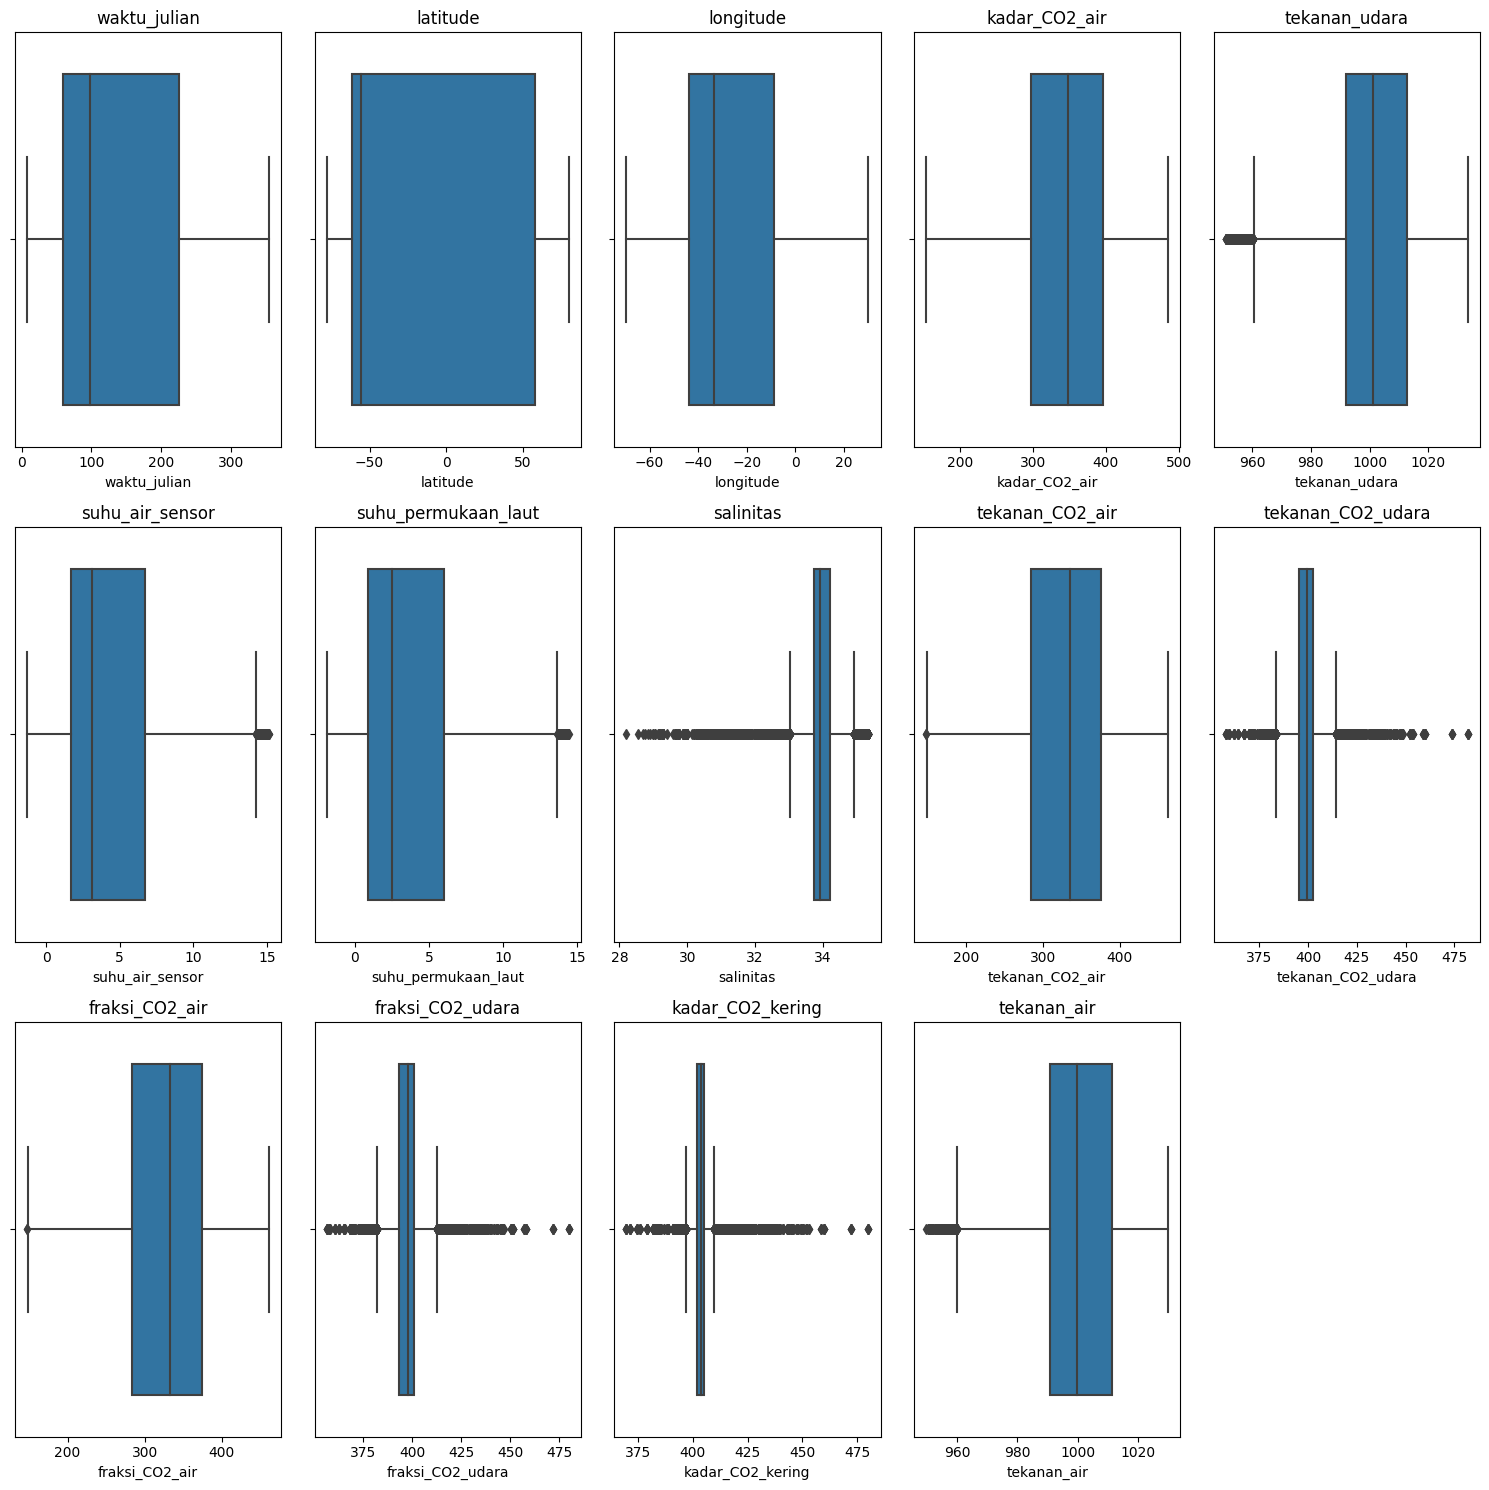

In [10]:
num_features = df.select_dtypes(include=['number']).columns

# Tentukan jumlah subplot
num_plots = len(num_features)
rows = (num_plots // 5) + (num_plots % 5 > 0)  # Atur jumlah baris secara otomatis
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(15, 5 * rows))

# Flatten axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Plot masing-masing boxplot di subplot
for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
numerical_outlier = [
    "tekanan_udara", "suhu_air_sensor", "suhu_permukaan_laut", "salinitas", 
    "tekanan_CO2_udara", "fraksi_CO2_udara", 
    "kadar_CO2_kering", "tekanan_air"
]

In [7]:
Q1 = df[numerical_outlier].quantile(0.25)
Q3 = df[numerical_outlier].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[~((df[numerical_outlier] < lower_bound) | (df[numerical_outlier] > upper_bound)).any(axis=1)]
df.shape

(16576, 16)

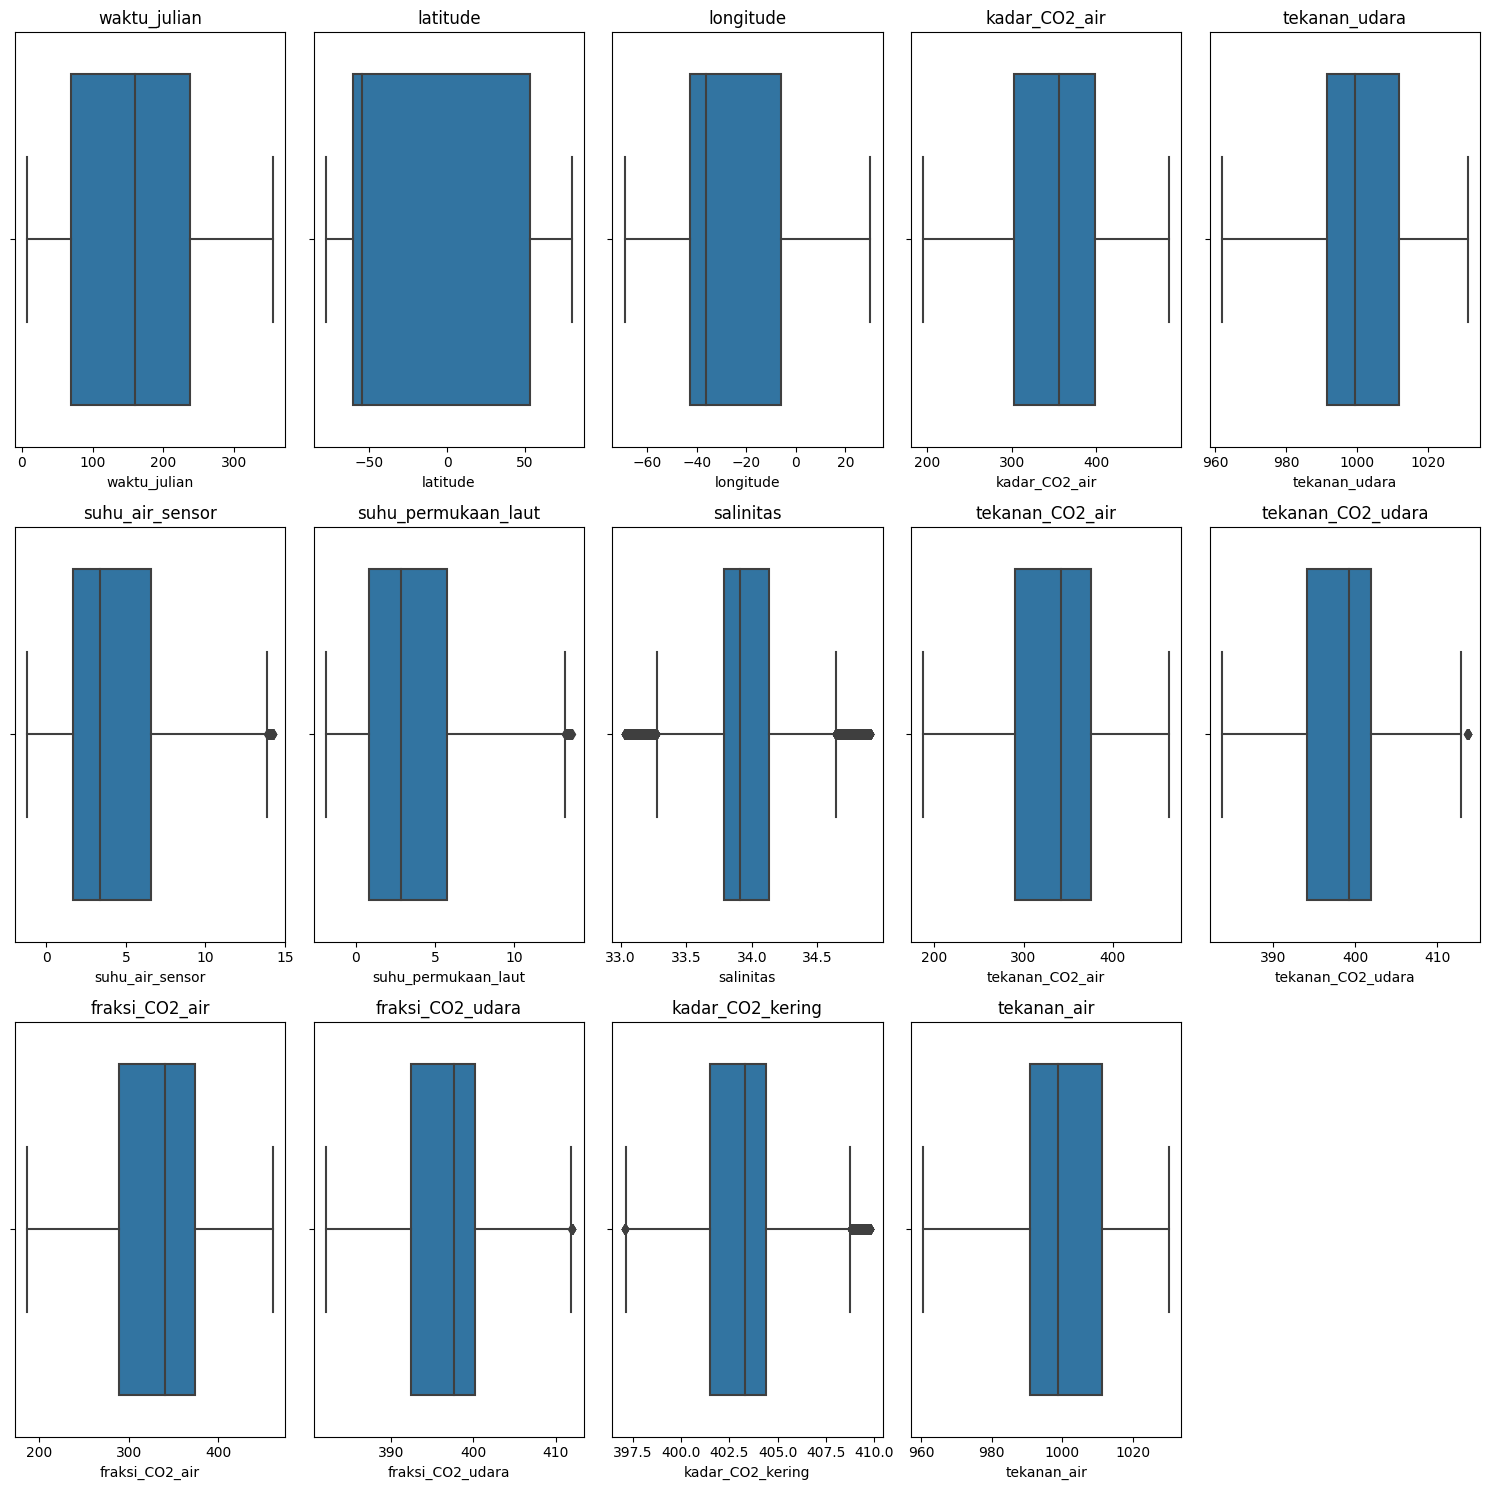

In [13]:
num_features = df.select_dtypes(include=['number']).columns

# Tentukan jumlah subplot
num_plots = len(num_features)
rows = (num_plots // 5) + (num_plots % 5 > 0)  # Atur jumlah baris secara otomatis
fig, axes = plt.subplots(nrows=rows, ncols=5, figsize=(15, 5 * rows))

# Flatten axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Plot masing-masing boxplot di subplot
for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Univariate Analysis

In [8]:
numerical_features = [
    "waktu_julian", "latitude", "longitude", "kadar_CO2_air", 
    "tekanan_udara", "suhu_air_sensor", "suhu_permukaan_laut", "salinitas", 
    "tekanan_CO2_air", "tekanan_CO2_udara", "fraksi_CO2_air", "fraksi_CO2_udara", 
    "kadar_CO2_kering", "tekanan_air"
]

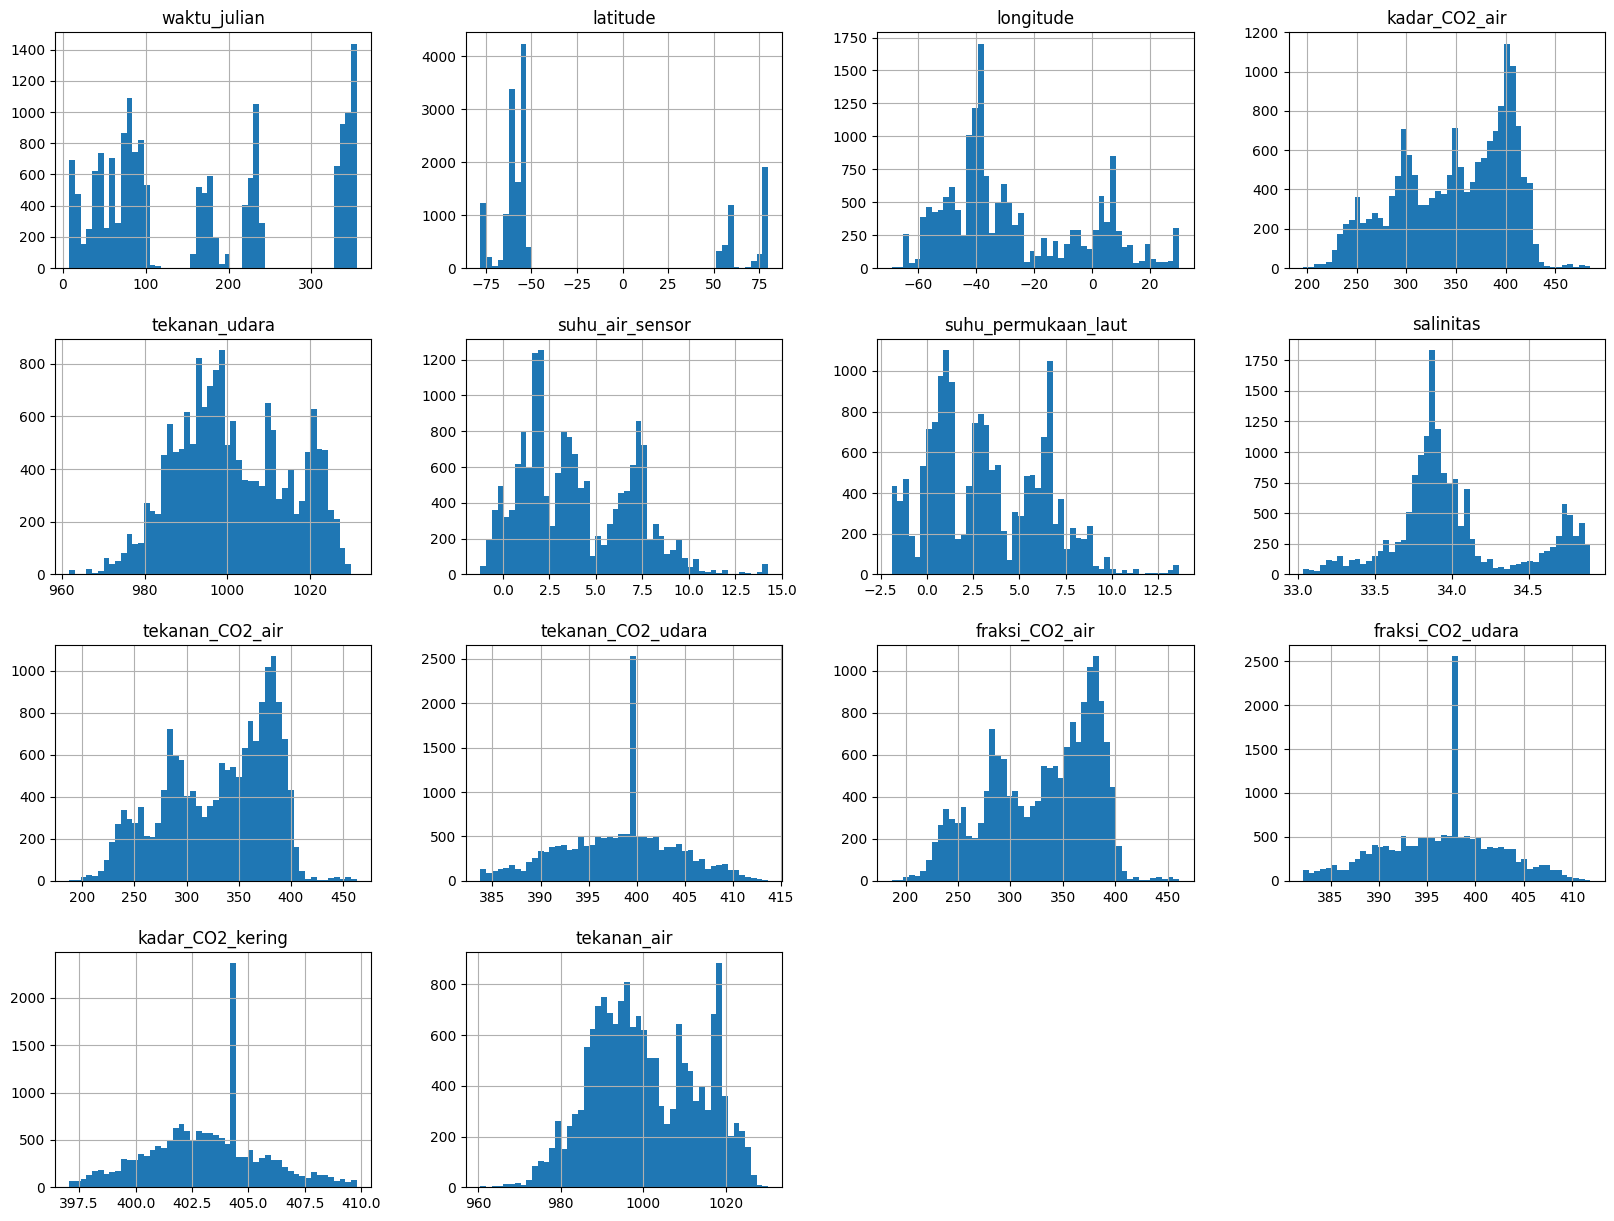

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

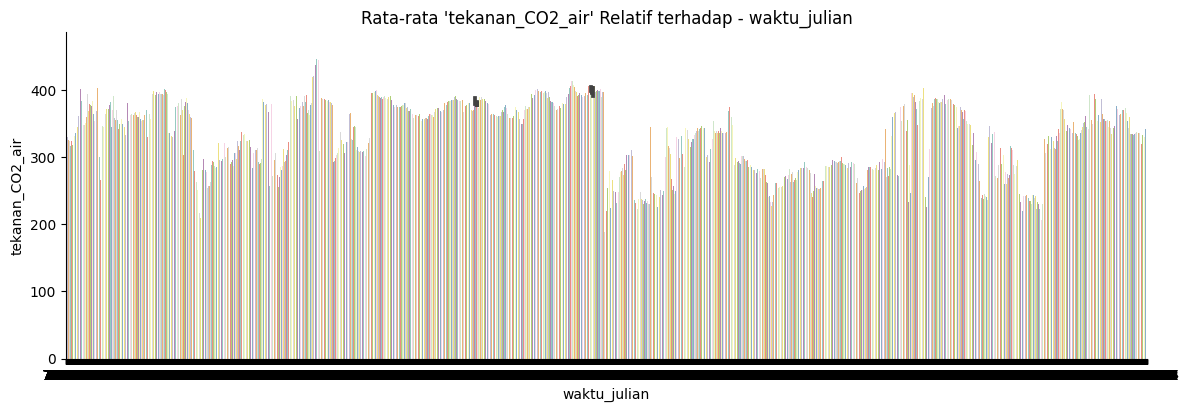

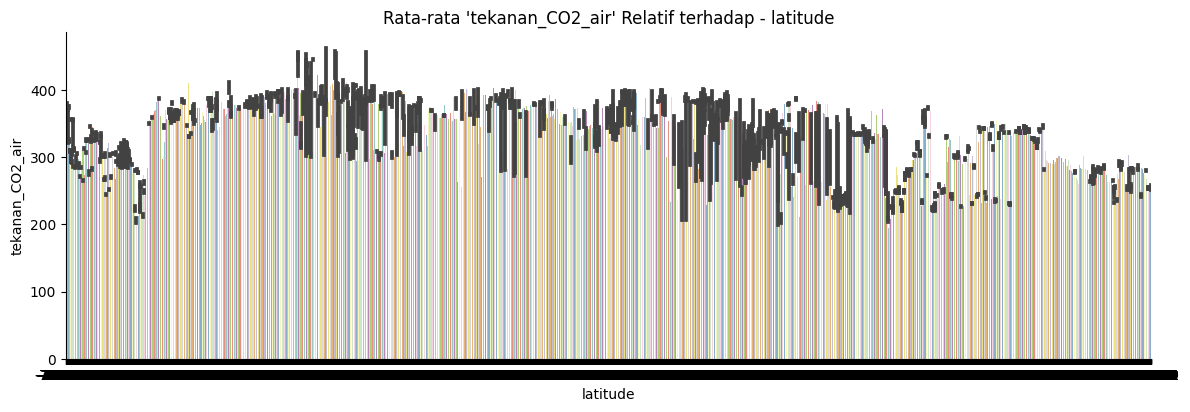

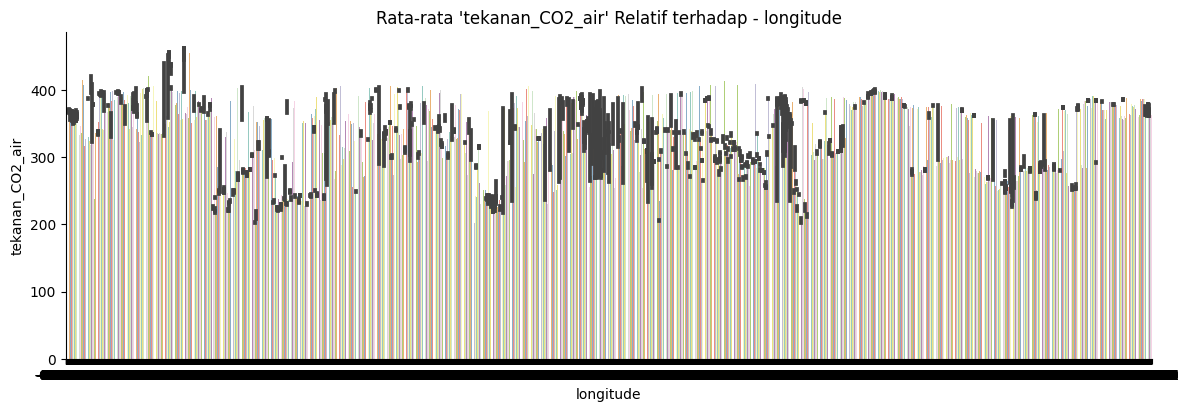

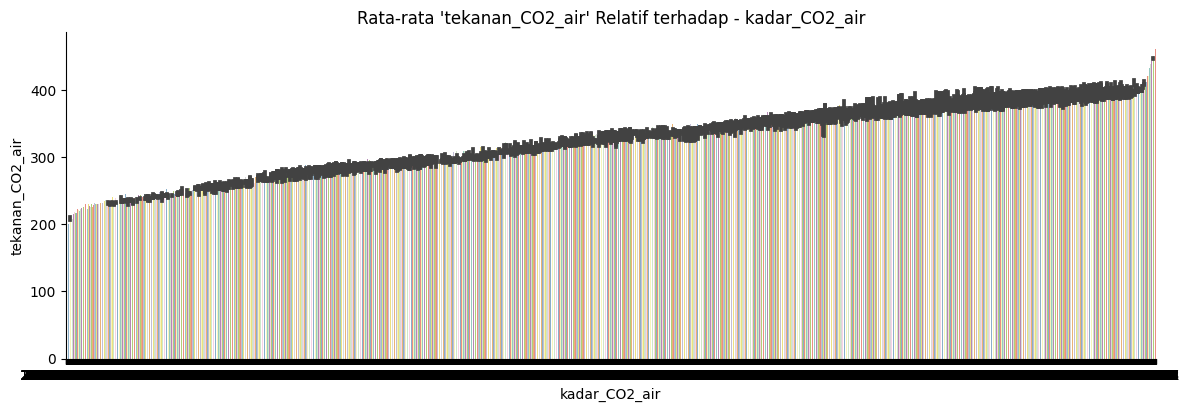

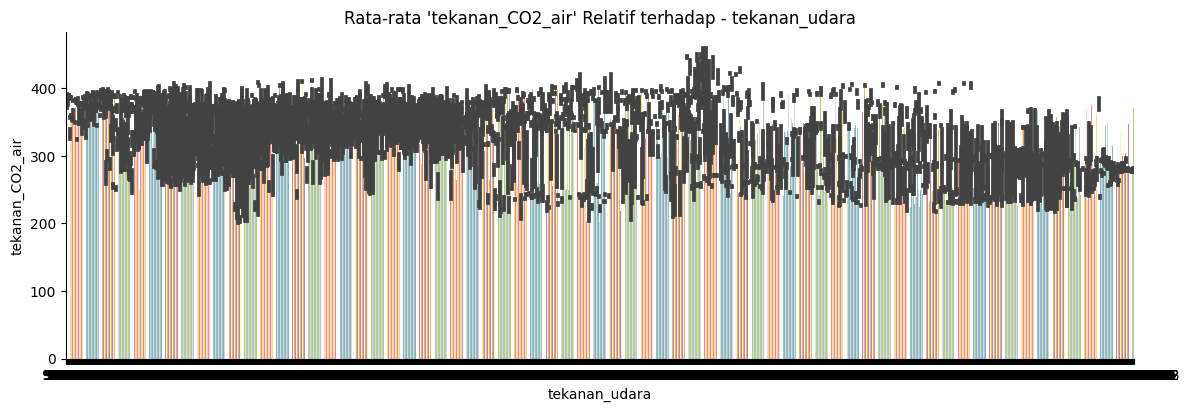

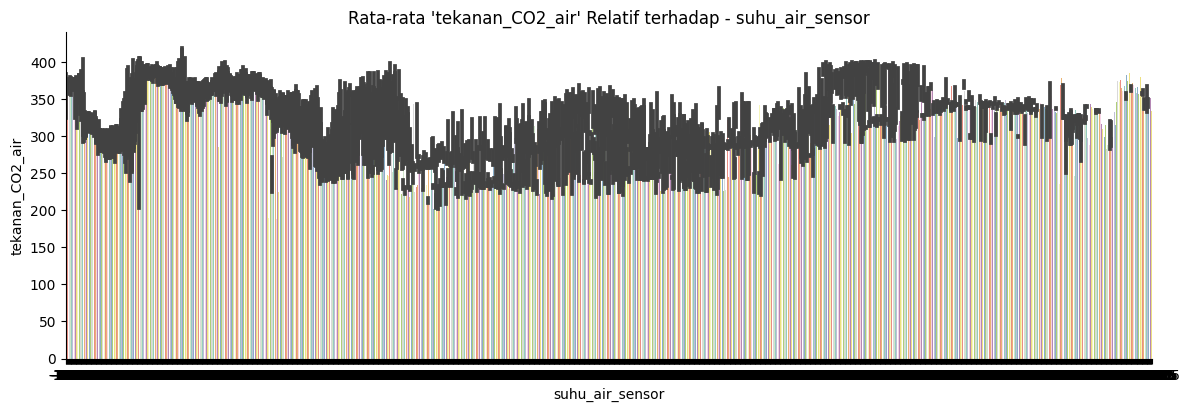

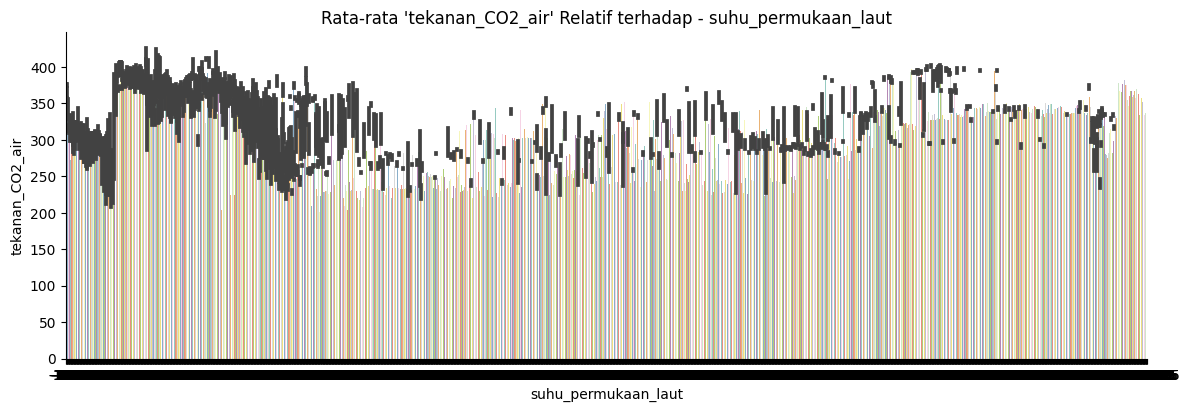

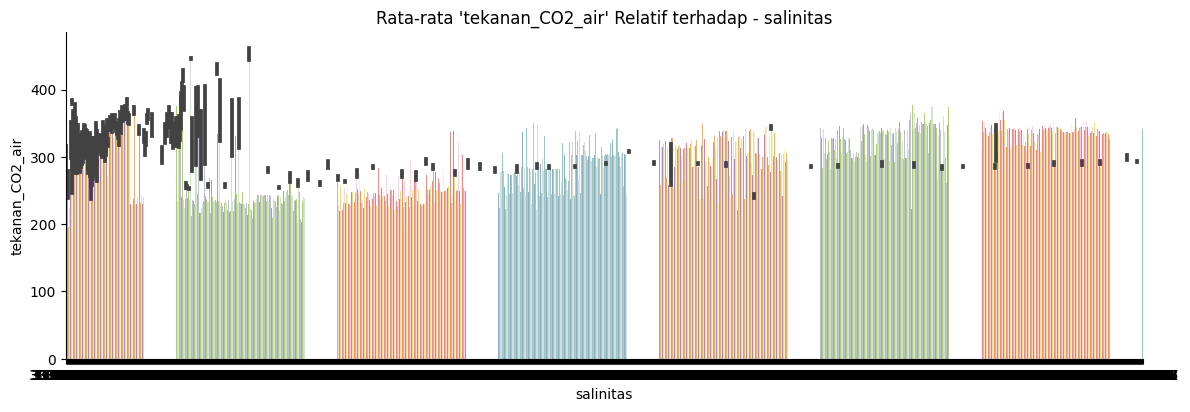

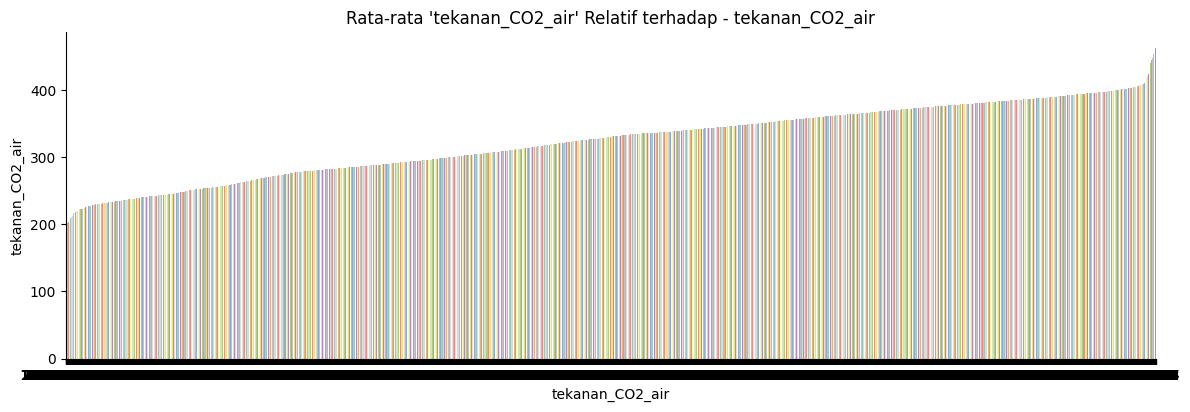

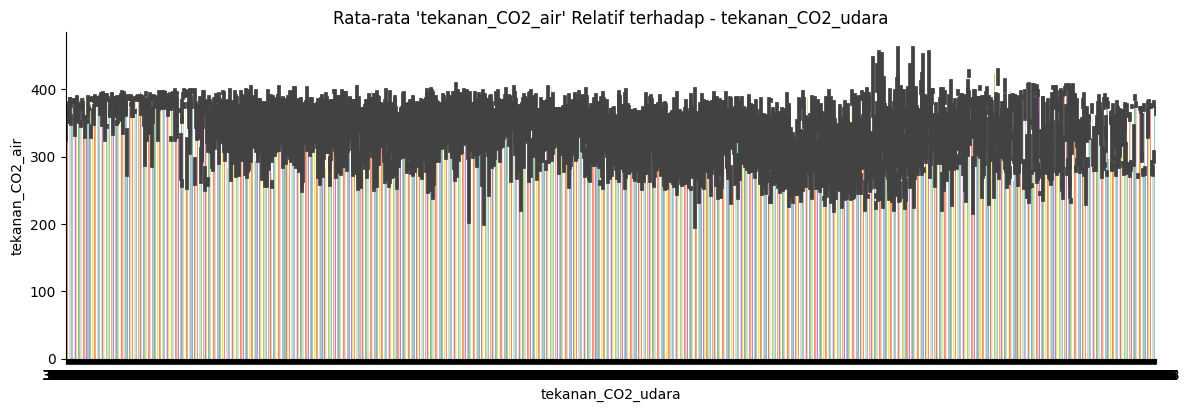

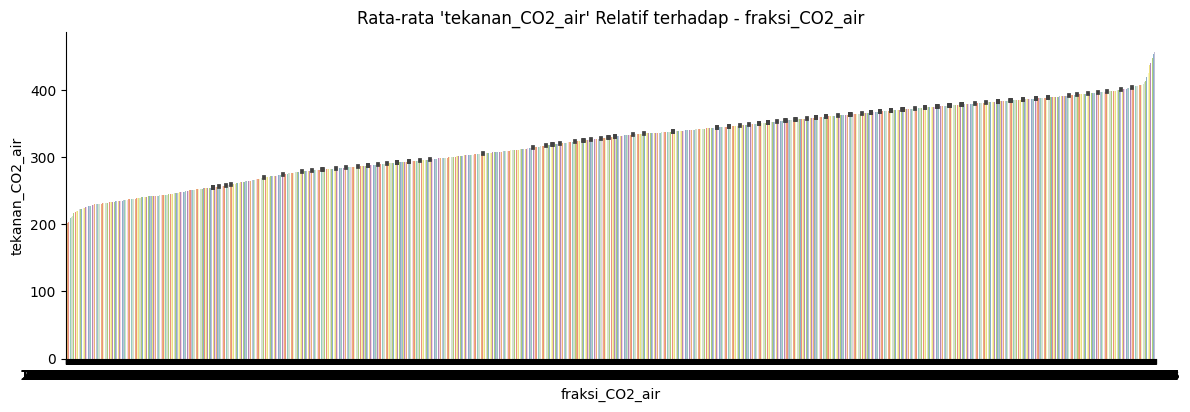

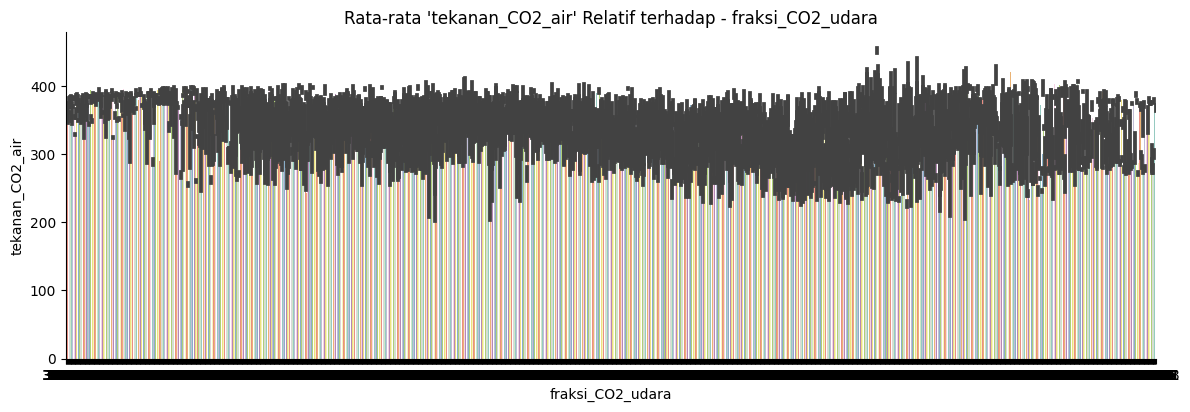

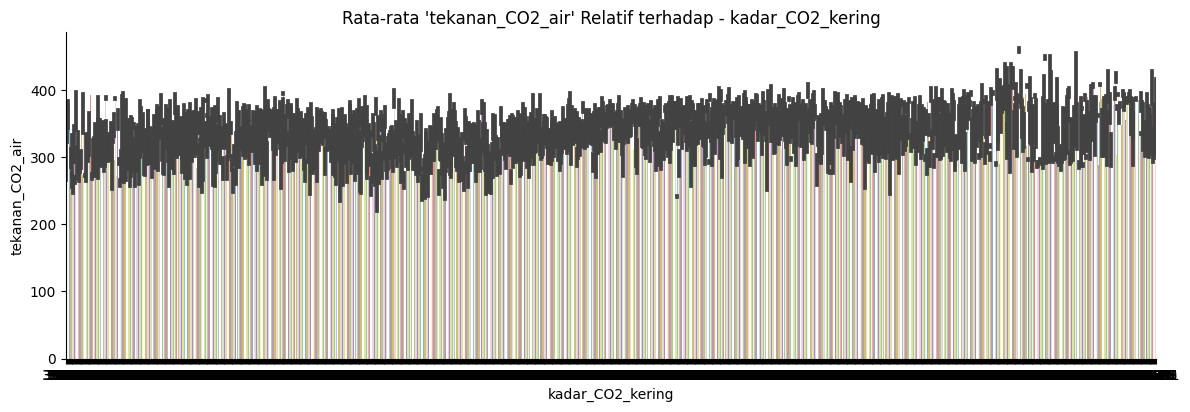

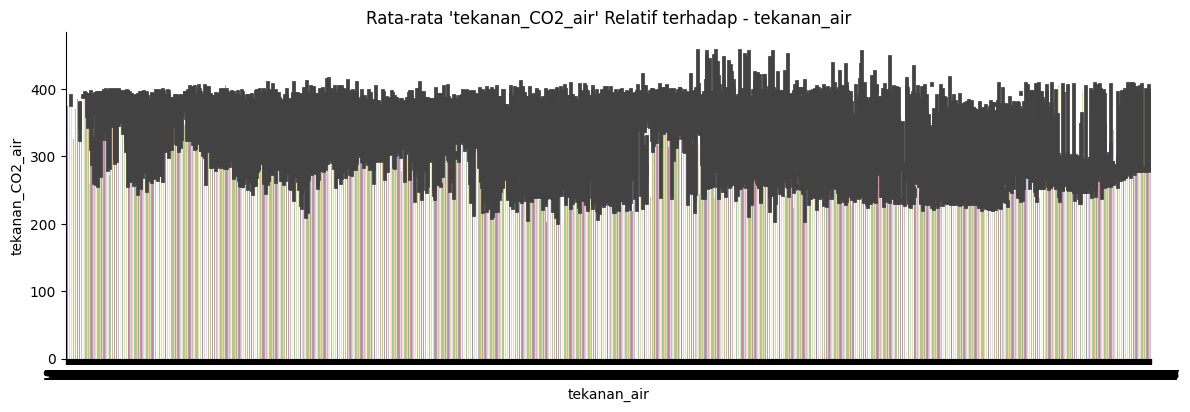

In [17]:
cat_features = df.select_dtypes(include='number').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="tekanan_CO2_air", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'tekanan_CO2_air' Relatif terhadap - {}".format(col))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

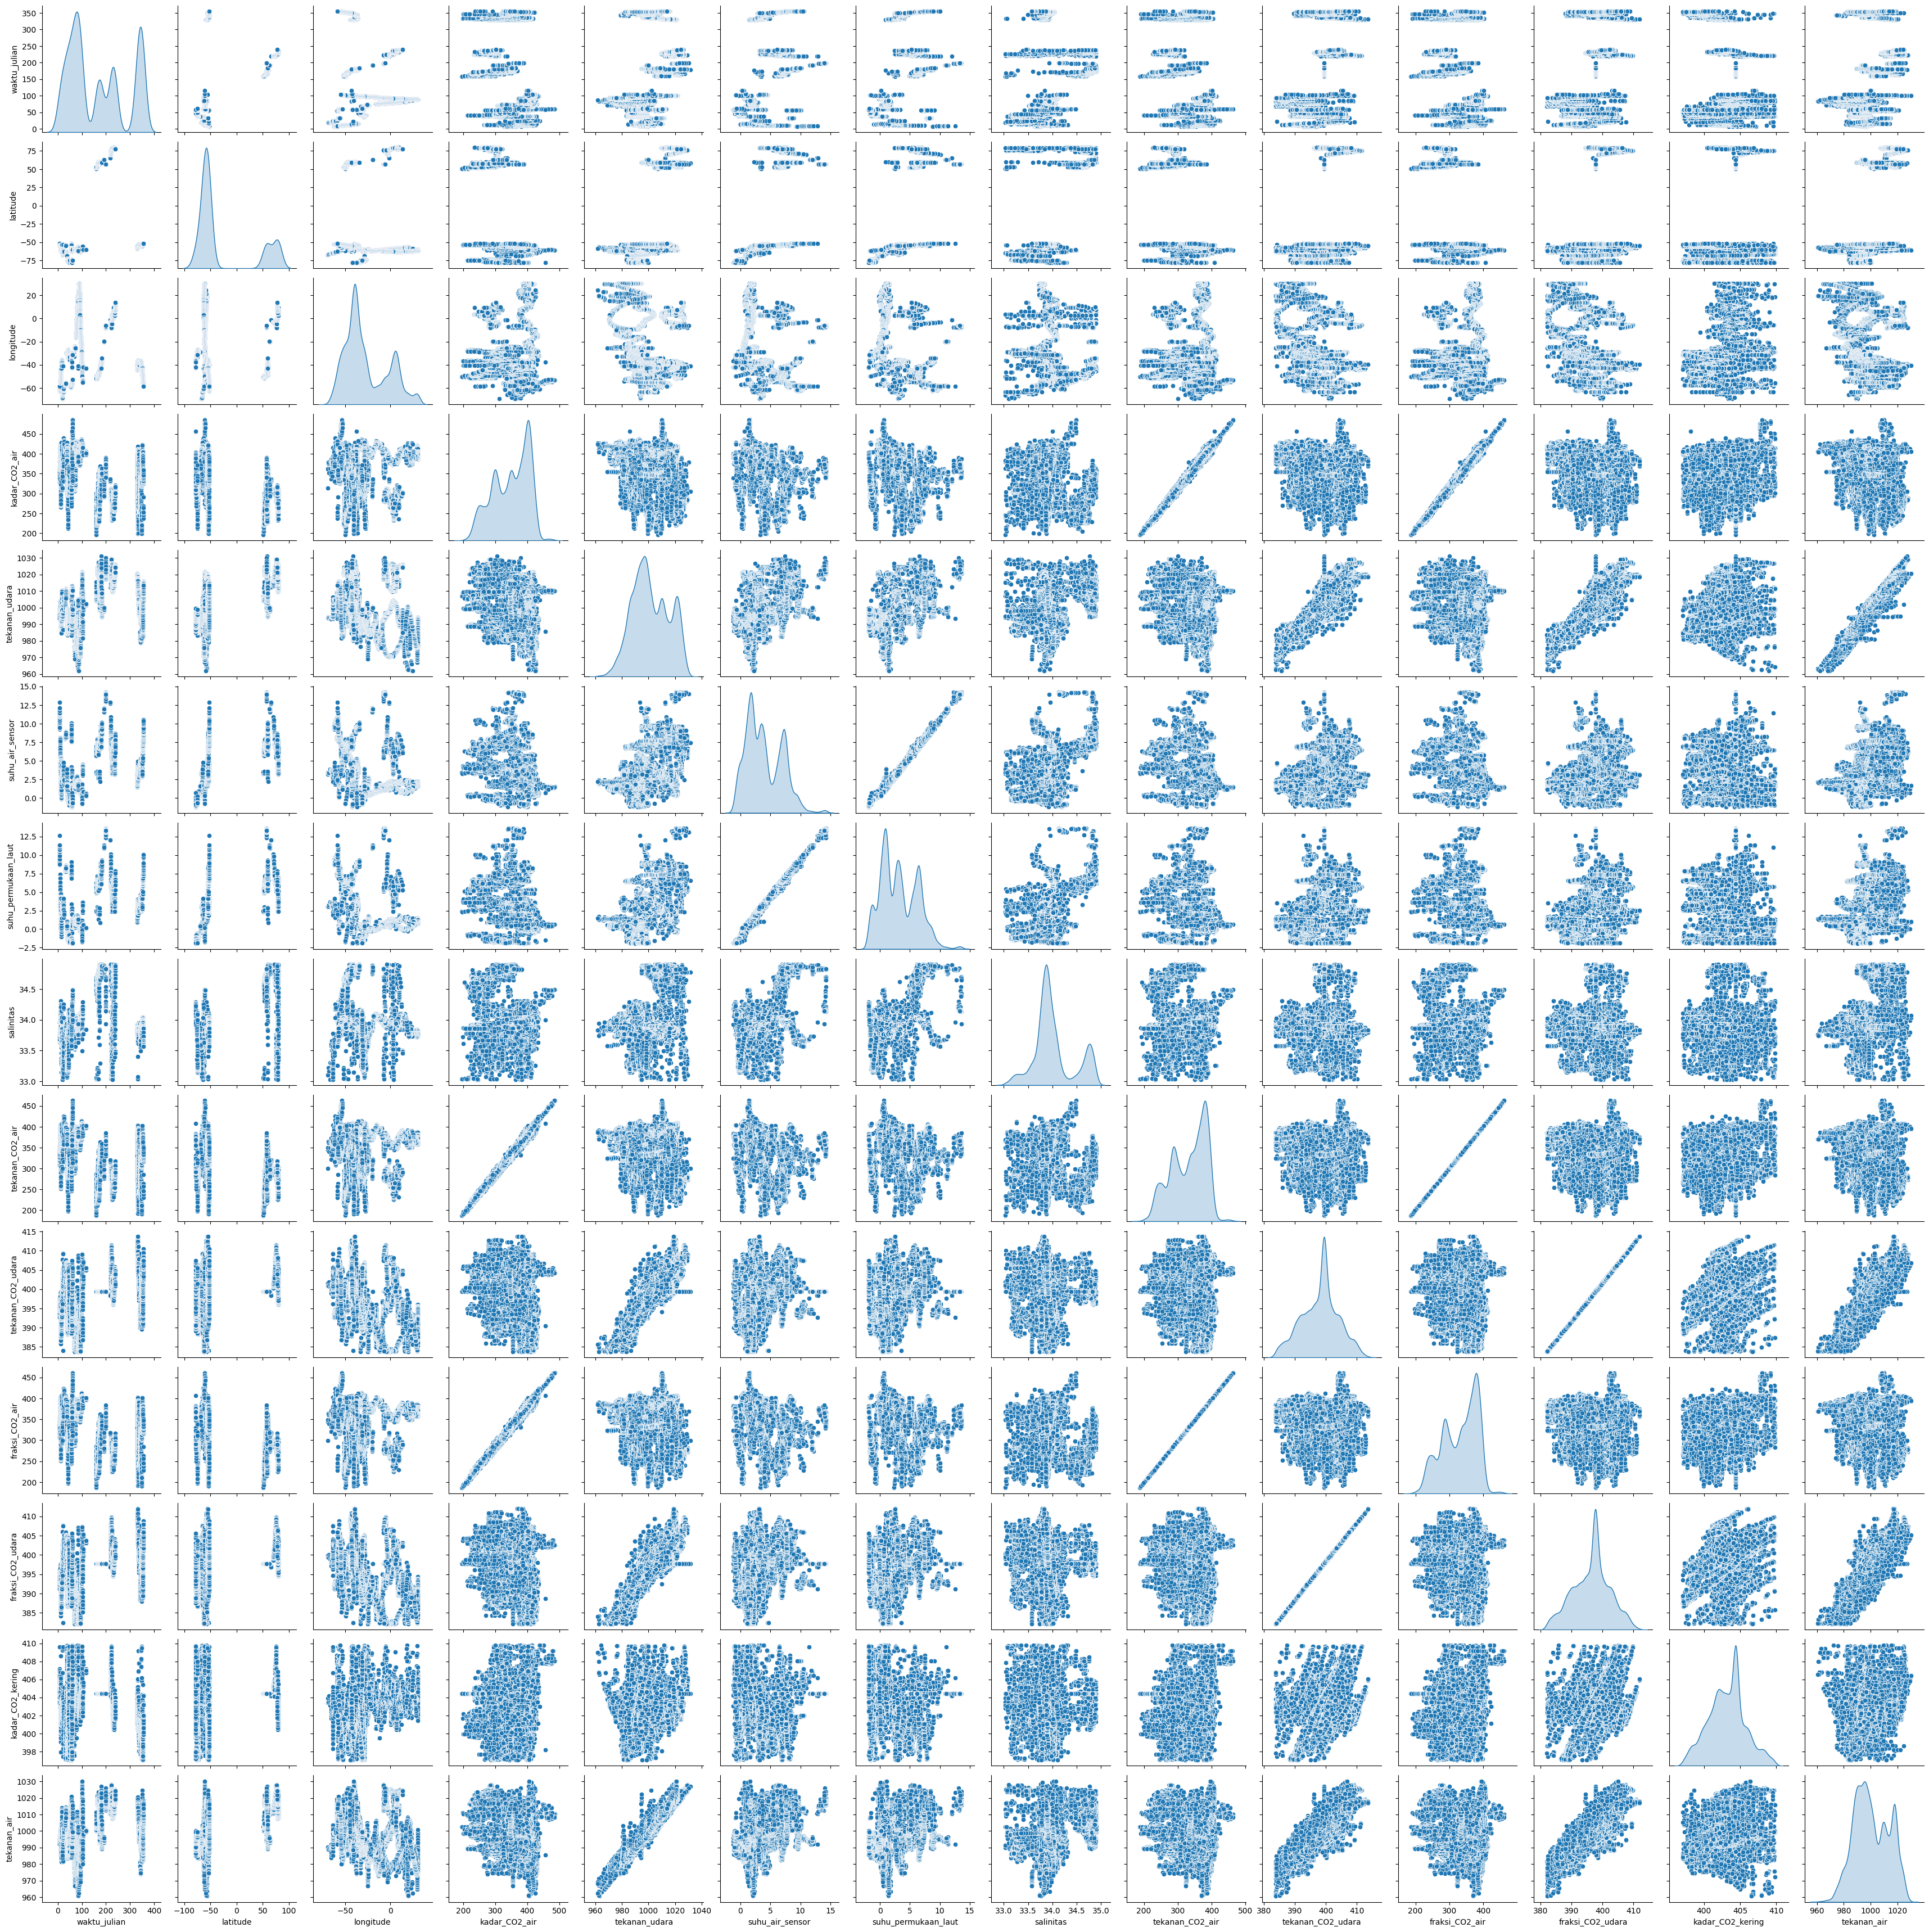

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

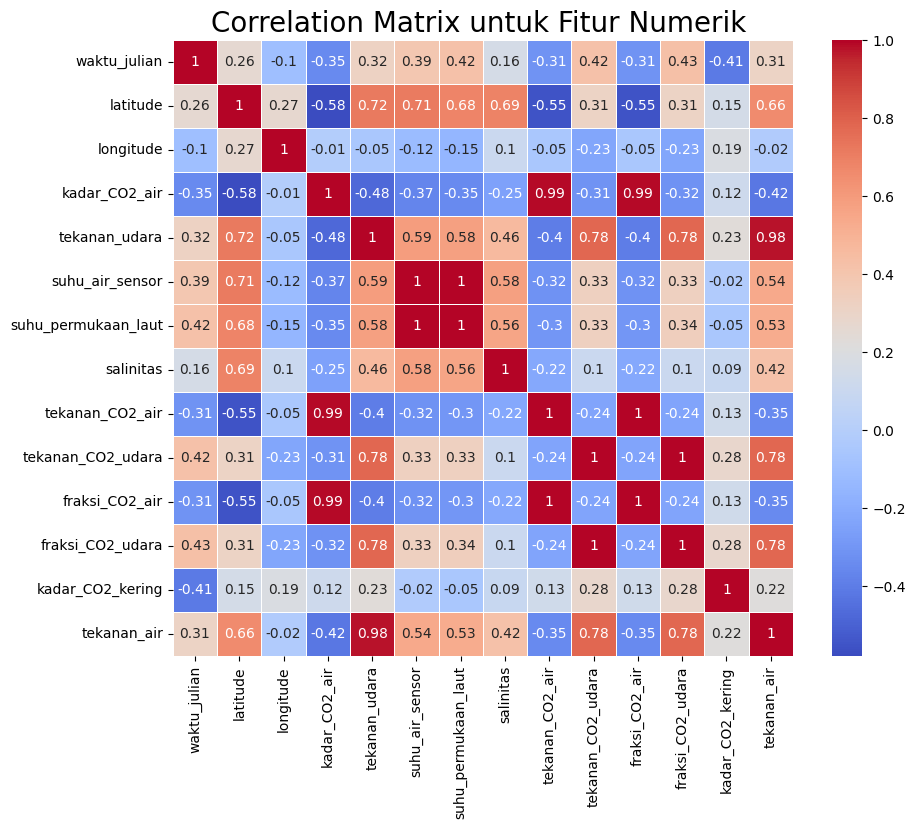

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

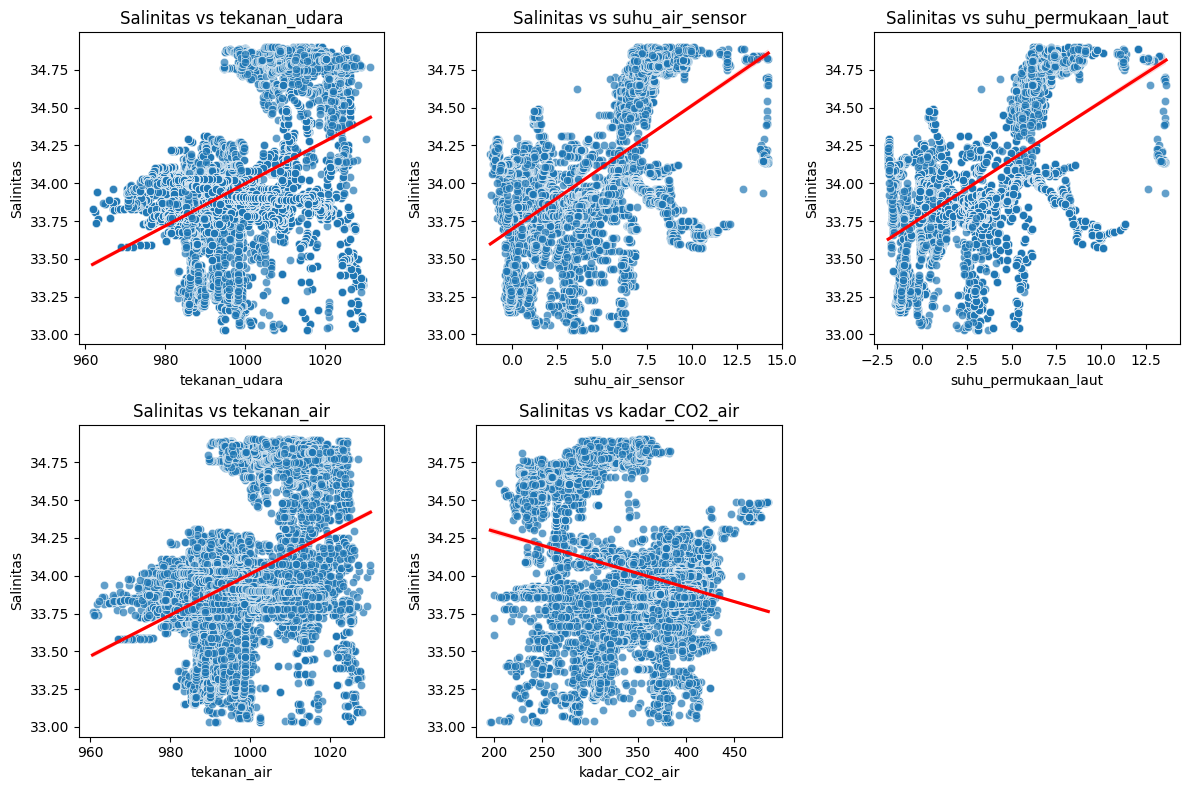

In [48]:
features = ["tekanan_udara", "suhu_air_sensor", "suhu_permukaan_laut", "tekanan_air", "kadar_CO2_air"]

# Set ukuran figure
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df["salinitas"], alpha=0.7)
    sns.regplot(x=df[feature], y=df["salinitas"], scatter=False, color='red')
    plt.xlabel(feature)
    plt.ylabel("Salinitas")
    plt.title(f"Salinitas vs {feature}")

plt.tight_layout()
plt.show()


# Data Preparation

In [10]:
df.drop(columns=["tanggal", "waktu", "waktu_julian", "latitude", "longitude", "tekanan_CO2_udara","fraksi_CO2_air", "fraksi_CO2_udara", "tekanan_CO2_air", "kadar_CO2_kering" ], inplace=True)
df.head()

kadar_CO2_air  tekanan_udara  suhu_air_sensor  suhu_permukaan_laut  \
0         380.41         997.69             9.81                 8.75   
1         360.27         997.69             9.78                 8.75   
2         352.18         997.69             9.75                 8.75   
3         356.39         997.69             9.51                 8.75   
4         355.02         997.69             9.31                 8.75   

   salinitas  tekanan_air  
0      33.74       994.48  
1      33.74       994.80  
2      33.74       995.20  
3      33.74       994.71  
4      33.74       994.91

## Dimensionality Reduction with PCA

In [11]:
from sklearn.decomposition import PCA

features_suhu = ["suhu_air_sensor", "suhu_permukaan_laut"]
features_tekanan = ["tekanan_air", "tekanan_udara"]

pca_suhu = PCA(n_components=1, random_state=42)
df["komponen_suhu"] = pca_suhu.fit_transform(df[features_suhu]).flatten()

pca_tekanan = PCA(n_components=1, random_state=42)
df["komponen_tekanan"] = pca_tekanan.fit_transform(df[features_tekanan]).flatten()

df.drop(features_suhu + features_tekanan, axis=1, inplace=True)


In [12]:
print(f"Variansi yang dijelaskan oleh komponen suhu: {pca_suhu.explained_variance_ratio_[0]:.2f}")
print(f"Variansi yang dijelaskan oleh komponen tekanan: {pca_tekanan.explained_variance_ratio_[0]:.2f}")

Variansi yang dijelaskan oleh komponen suhu: 1.00
Variansi yang dijelaskan oleh komponen tekanan: 0.99


## Train-Test-Split

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["salinitas"]) 
y = df["salinitas"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")


Jumlah data latih: 14918
Jumlah data uji: 1658


## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

# Daftar fitur numerik yang tersisa setelah PCA
numerical_features = ["komponen_suhu", "komponen_tekanan", "kadar_CO2_air"]

scaler = StandardScaler()

scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

X_train[numerical_features].head()


komponen_suhu  komponen_tekanan  kadar_CO2_air
22552       0.187376         -0.063475      -1.744335
11188      -0.617561         -0.117844       0.502553
10141      -0.779114          0.364271      -0.380879
4783        0.702605         -1.356662      -2.144719
6497        1.154145         -1.824417      -0.798270

In [15]:
X_train[numerical_features].describe().round(4)

komponen_suhu  komponen_tekanan  kadar_CO2_air
count     14918.0000        14918.0000     14918.0000
mean         -0.0000           -0.0000         0.0000
std           1.0000            1.0000         1.0000
min          -1.7290           -2.1416        -2.7352
25%          -0.7781           -0.8100        -0.8226
50%          -0.1516            0.1381         0.1267
75%           0.8861            0.7588         0.8921
max           3.5004            2.9798         2.4726

In [56]:
df.head()

kadar_CO2_air  salinitas  komponen_suhu  komponen_tekanan
0         380.41      33.74       8.084419          6.859847
1         360.27      33.74       8.063551          6.640800
2         352.18      33.74       8.042684          6.366991
3         356.39      33.74       7.875743          6.702407
4         355.02      33.74       7.736625          6.565502

# Modeling

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

## Grid Search 

In [17]:
from tabulate import tabulate

def grid_search_model(X, y):
    algos = {
        'KNN': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 7, 9, 11, 13, 15],
                'weights': ['uniform', 'distance']
            }
        },
        'Random Forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [8, 16, 32],
                'random_state': [42]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [3, 5, 7]
            }
        }
    }

    scores = []
    best_models = {} 
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=123)

    for algo_name, config in algos.items():
        print(f"Training {algo_name}...")
        gs = GridSearchCV(config['model'], config['params'], cv=cv, scoring='r2', n_jobs=-1)
        gs.fit(X, y)
        best_models[algo_name] = gs.best_estimator_
        scores.append({
            'Model': algo_name,
            'Best Score': round(gs.best_score_, 4), 
            'Best Params': gs.best_params_
        })

    df_results = pd.DataFrame(scores)

    print(tabulate(df_results, headers="keys", tablefmt="grid"))

    return df_results, best_models 

results, best_models = grid_search_model(X_train, y_train)

Training KNN...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
+----+-------------------+--------------+-------------------------------------------------------------+
|    | Model             |   Best Score | Best Params                                                 |
+====+===================+==============+=============================================================+
|  0 | KNN               |       0.9475 | {'n_neighbors': 5, 'weights': 'distance'}                   |
+----+-------------------+--------------+-------------------------------------------------------------+
|  1 | Random Forest     |       0.9434 | {'max_depth': 32, 'n_estimators': 150, 'random_state': 42}  |
+----+-------------------+--------------+-------------------------------------------------------------+
|  2 | Gradient Boosting |       0.9273 | {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150} |
+----+-------------------+--------------+-----------------------------------

## Best Algorithm

In [19]:
# KNN
best_knn = best_models['KNN']

# Random Forest
best_rf = best_models['Random Forest']

# Gradient Boosting
best_gb = best_models['Gradient Boosting']

# XGBoost
best_xgb = best_models['XGBoost']


# Evaluation

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

model_dict = {
    'KNN': best_knn,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'XGBoost': best_xgb
}

results = []
mse = pd.DataFrame(columns=['Train MSE', 'Test MSE'], index=model_dict.keys())

for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    
    results.append([name, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)])
    
    # Hitung MSE untuk train & test
    mse.loc[name] = [mean_squared_error(y_train, model.predict(X_train)), 
                     mean_squared_error(y_test, y_pred)]

df_results = pd.DataFrame(results, columns=['Model', 'MSE', 'R²'])

print("\n### Model Performance ###")
print(tabulate(df_results, headers='keys', tablefmt='pretty', floatfmt=".4f"))

print("\n### Mean Squared Error (MSE) Comparison ###")
print(tabulate(mse, headers='keys', tablefmt='pretty', floatfmt=".4f"))



### Model Performance ###
+---+-------------------+----------------------+--------------------+
|   |       Model       |         MSE          |         R²         |
+---+-------------------+----------------------+--------------------+
| 0 |        KNN        | 0.00660349215713621  | 0.9601092366835514 |
| 1 |   Random Forest   | 0.006323426950224792 | 0.9618010710366827 |
| 2 | Gradient Boosting | 0.009191984401410312 | 0.9444725206845457 |
| 3 |      XGBoost      | 0.008791987380791271 | 0.9468888461827981 |
+---+-------------------+----------------------+--------------------+

### Mean Squared Error (MSE) Comparison ###
+-------------------+-----------------------+----------------------+
|                   |       Train MSE       |       Test MSE       |
+-------------------+-----------------------+----------------------+
|        KNN        |          0.0          | 0.00660349215713621  |
|   Random Forest   | 0.0011192798448424438 | 0.006323426950224792 |
| Gradient Boosting | 0

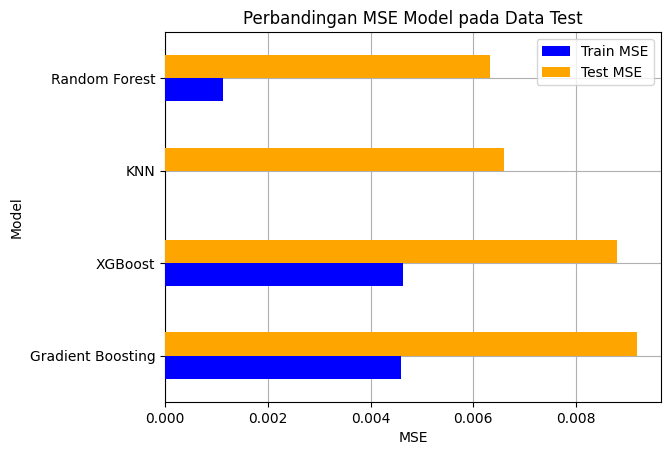

In [28]:
fig, ax = plt.subplots()
mse.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3, color=['blue', 'orange', 'green', 'red'])
ax.set_title("Perbandingan MSE Model pada Data Test")
ax.set_xlabel("MSE")
ax.set_ylabel("Model")
ax.grid(zorder=0)
plt.show()


In [29]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_Random Forest  \
16192  33.440000          33.4                    33.7   
8826   33.830000          33.8                    33.8   
717    33.290000          33.2                    33.3   
10846  33.890000          33.9                    33.9   
5260   34.541404          34.5                    34.5   

       prediksi_Gradient Boosting  prediksi_XGBoost  
16192                        33.8         33.700001  
8826                         33.9         33.900002  
717                          33.4         33.400002  
10846                        33.9         33.799999  
5260                         34.5         34.500000